 # 기본 전처리 및 Baseline model

* 데이터에 대한 기본 전처리를 수행한 후
* Baseline 모델을 생성하고 평가합니다.

# 1.환경준비

## (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

import warnings
warnings.filterwarnings(action='ignore')

## (2) 데이터 불러오기

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/retail_demand2.csv'
data = pd.read_csv(path, usecols = ['date', 'sales', 'tot_sales', 'comp_sales'])
data = data.loc[data['date']<= '2015-10-31'].reset_index(drop = True)
data.head()

,date,sales,tot_sales,comp_sales
0,2013-01-01,45,456,43
1,2013-01-02,53,474,57
2,2013-01-03,65,519,45
3,2013-01-04,66,527,45
4,2013-01-05,97,575,55


* 변수 설명

    * date : 날짜
    * sales : A유통회사 a 매장 aa상품의 일별 판매량
    * tot_sales : A유통회사 전 매장 aa상품의 일별 판매량
    * comp_sales : a매장 인근 B유통회사(경쟁사) b매장 aa상품의 일별 판매량

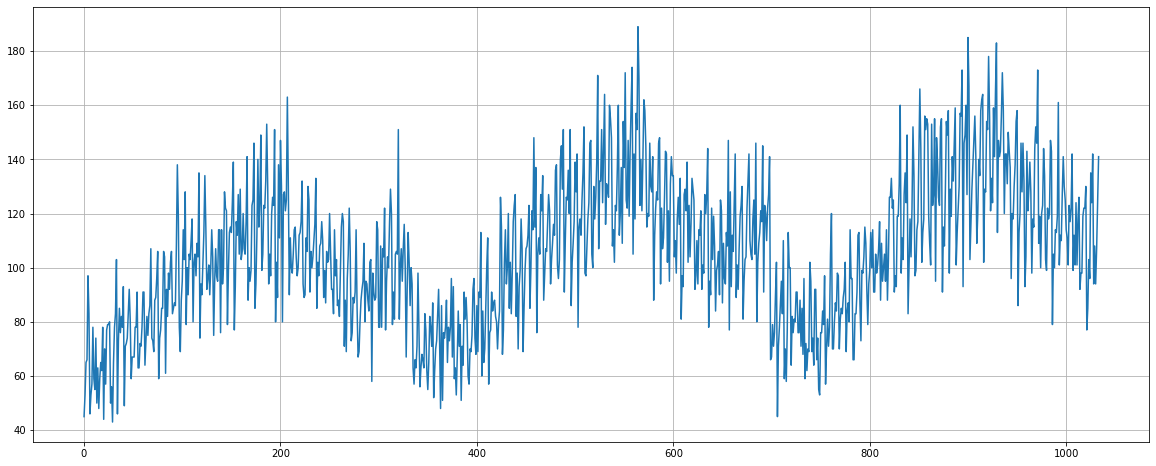

In [3]:
plt.figure(figsize = (20,8))
plt.plot(data['sales'])
plt.grid()
plt.show()

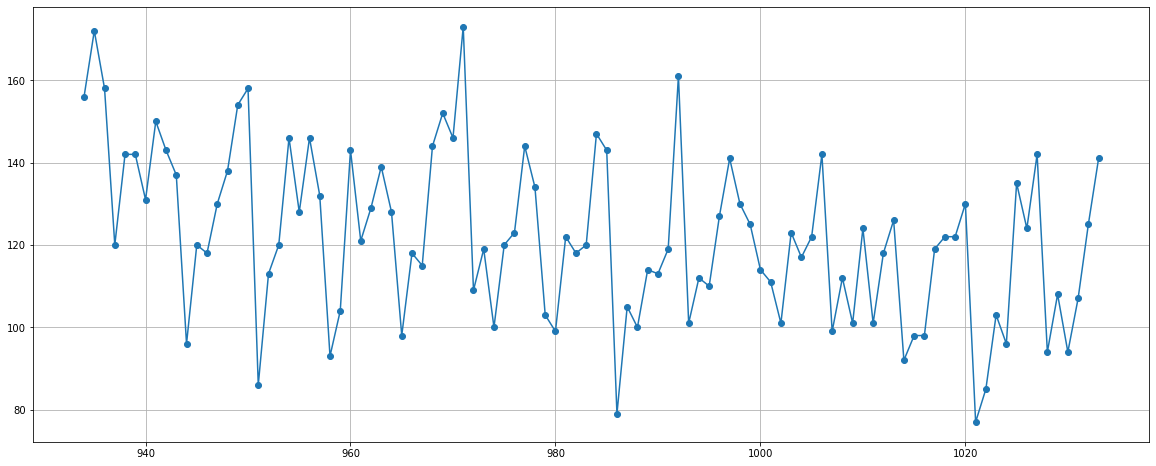

In [4]:
temp = data[-100:]
plt.figure(figsize = (20,8))
plt.plot(temp['sales'], marker ='o')
plt.grid()
plt.show()

# 2.기본 전처리

## (1) 날짜 인덱스

### 1) 날짜 타입으로 변경하기

In [5]:
# 데이터프레임의 정보를 살펴 봅시다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1034 non-null   object
 1   sales       1034 non-null   int64 
 2   tot_sales   1034 non-null   int64 
 3   comp_sales  1034 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 32.4+ KB


* 날짜 요소로 변환하기 : pd.to_datetime( *날짜형식으로 저장된 문자열 변수*   , **format** = )  
* format : 일반적인(쉽게 인식 가능한 형태)는 생략 가능 (예 : yyyy-mm-dd hh:mi:ss)
    * to_datetime : https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
    * format : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [6]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1034 non-null   datetime64[ns]
 1   sales       1034 non-null   int64         
 2   tot_sales   1034 non-null   int64         
 3   comp_sales  1034 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 32.4 KB


### 2) 날짜를 인덱스로 변환하기

In [7]:
data['DT'] = data['date']
data.set_index('DT', inplace=True)
data.head()

,date,sales,tot_sales,comp_sales
DT,,,,
2013-01-01,2013-01-01,45,456,43
2013-01-02,2013-01-02,53,474,57
2013-01-03,2013-01-03,65,519,45
2013-01-04,2013-01-04,66,527,45
2013-01-05,2013-01-05,97,575,55


### 3) 날짜단위 지정하기 : freq

* **분석 단위**를 어떻게 가져갈 것인가와 관련이 있습니다.
* 시계열 데이터를 **일정한 시간 간격**으로 만들어 줍니다.
* 인덱스 조회시, 마지막에 있는 **freq** 옵션

In [8]:
data.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2015-10-22', '2015-10-23', '2015-10-24', '2015-10-25',
               '2015-10-26', '2015-10-27', '2015-10-28', '2015-10-29',
               '2015-10-30', '2015-10-31'],
              dtype='datetime64[ns]', name='DT', length=1034, freq=None)

* 변경하기 
    * 시간단위 : H
    * 일 : D  (일 중 가장 빠른 시간의 데이터)
    * 월 : 
        * M (월 중 가장 마지막 날 데이터)
        * MS (월 중 가장 첫 날 데이터)    

* asfreq : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html
* freq 지정 방식 설명 : https://rfriend.tistory.com/506

In [12]:
# 일단위
data.asfreq('D').head()

,date,sales,tot_sales,comp_sales
DT,,,,
2013-01-01,2013-01-01,45,456,43
2013-01-02,2013-01-02,53,474,57
2013-01-03,2013-01-03,65,519,45
2013-01-04,2013-01-04,66,527,45
2013-01-05,2013-01-05,97,575,55


In [10]:
# 월(말)단위
data.asfreq('M').head()

,date,sales,tot_sales,comp_sales
DT,,,,
2013-01-31,2013-01-31,65,504,35
2013-02-28,2013-02-28,71,517,53
2013-03-31,2013-03-31,106,824,80
2013-04-30,2013-04-30,94,706,67
2013-05-31,2013-05-31,113,872,67


In [11]:
# 월초 단위
data.asfreq('MS').head()

,date,sales,tot_sales,comp_sales
DT,,,,
2013-01-01,2013-01-01,45,456,43
2013-02-01,2013-02-01,78,606,43
2013-03-01,2013-03-01,78,739,62
2013-04-01,2013-04-01,83,584,63
2013-05-01,2013-05-01,90,752,74


### 4) 빠진 값 찾기
예제 데이터에서는 없지만, 실제 쌓인 데이터에서는 빠진 데이터 발생 가능

In [13]:
temp = data.asfreq('D')

In [14]:
temp.isna().sum()

date          0
sales         0
tot_sales     0
comp_sales    0
dtype: int64

* 만약 빠진 데이터가 있다면, 아래와 같이 채울 수 있음.

In [15]:
data.asfreq('D', method = 'ffill')

,date,sales,tot_sales,comp_sales
DT,,,,
2013-01-01,2013-01-01,45,456,43
2013-01-02,2013-01-02,53,474,57
2013-01-03,2013-01-03,65,519,45
2013-01-04,2013-01-04,66,527,45
2013-01-05,2013-01-05,97,575,55
...,...,...,...,...
2015-10-27,2015-10-27,108,818,81
2015-10-28,2015-10-28,94,796,74
2015-10-29,2015-10-29,107,830,82


* 여기서는 일 단위 데이터이므로 D로 지정

In [16]:
df = data.asfreq('D')
df.head()

,date,sales,tot_sales,comp_sales
DT,,,,
2013-01-01,2013-01-01,45,456,43
2013-01-02,2013-01-02,53,474,57
2013-01-03,2013-01-03,65,519,45
2013-01-04,2013-01-04,66,527,45
2013-01-05,2013-01-05,97,575,55


## (2) y 만들기

* 사전 관찰(look-ahead) : 미래의 어떤 사실을 안다는 뜻
* 사전 관찰 문제 : 
    * 데이터를 통해 실제로 알아야 하는 시점보다 더 일찍 미래에 대한 사실을 알게 되는 문제.  
    * 사전관찰 문제가 있는 채로 모델링을 하게 되면, 놀라운 성능의 모델이 만들어짐. --> 그러나 실제로는 불가능한 상황.

* 그래서 y를 만들때 사전관찰문제가 발생되지 않도록 해야 함.
    * 예제는 1일 후의 수요량을 예측하려고 합니다.

* 1일 후 수요량을 예측하려면, y를 어떻게 만들어야 할까요?

In [17]:
df['y'] = df['sales'].shift(-1)
display(df.head())
display(df.tail())

,date,sales,tot_sales,comp_sales,y
DT,,,,,
2013-01-01,2013-01-01,45,456,43,53.0
2013-01-02,2013-01-02,53,474,57,65.0
2013-01-03,2013-01-03,65,519,45,66.0
2013-01-04,2013-01-04,66,527,45,97.0
2013-01-05,2013-01-05,97,575,55,83.0


,date,sales,tot_sales,comp_sales,y
DT,,,,,
2015-10-27,2015-10-27,108,818,81,94.0
2015-10-28,2015-10-28,94,796,74,107.0
2015-10-29,2015-10-29,107,830,82,125.0
2015-10-30,2015-10-30,125,912,76,141.0
2015-10-31,2015-10-31,141,1034,92,NaN


In [26]:
# 제일 마지막 행은 삭제
df.dropna(axis = 0, inplace = True)
df.tail()

,date,sales,tot_sales,comp_sales,y
DT,,,,,
2015-10-26,2015-10-26,94,698,70,108.0
2015-10-27,2015-10-27,108,818,81,94.0
2015-10-28,2015-10-28,94,796,74,107.0
2015-10-29,2015-10-29,107,830,82,125.0
2015-10-30,2015-10-30,125,912,76,141.0


## (3) 데이터 분할

### 1) x, y 나누기

* .values(넘파이 어레이)로 변환해서 저장하는 이유 ➡ 데이터 스플릿 index를 적용해서 데이터를 가져오기 위해서

In [27]:
target = 'y'

x = df.drop([target, 'date'], axis = 1)
y = df.loc[:, target]

### 2) 시계열 데이터 분할

* 다음의 조건으로 Cross Validation을 수행하겠습니다.
    * 3-fold
    * Validation 기간 30일

* TimeSeriesSplit : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [28]:
x.iloc[:5]

,sales,tot_sales,comp_sales
DT,,,
2013-01-01,45,456,43
2013-01-02,53,474,57
2013-01-03,65,519,45
2013-01-04,66,527,45
2013-01-05,97,575,55


In [29]:
from sklearn.model_selection import TimeSeriesSplit

In [30]:
x.shape

(1033, 3)

In [31]:
# validation set size
val_size = 30
nfold = 3

tscv = TimeSeriesSplit(n_splits = nfold, test_size = val_size)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=30)

In [32]:
# .split을 이용하여 fold 하나씩 인덱스들을 뽑아 낼 수 있음.
for train_index, val_index in tscv.split(x):
    print("Train:", train_index, "Val:", val_index)

Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

**tscv**는 모델링 수행시 cv 적용에 사용됩니다.

# 3.Baseline Model 생성

* Baseline 모델은 성능 시작점을 제공합니다.
* 성능 측정은 ML metric과 Biz metric으로 평가합니다.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import * 

## (1) loop 돌며 모델링(cross-validation) 수행

In [34]:
rmse, mae, mape = [],[],[]
residuals = []
pred = []
model = LinearRegression()

for train_index, val_index in tscv.split(x):

    # 인덱스로 데이터 분할
    x_train, y_train = x.iloc[train_index], y.iloc[train_index]
    x_val, y_val = x.iloc[val_index], y.iloc[val_index]

    # 학습
    model.fit(x_train, y_train)

    # 예측
    pr = model.predict(x_val)
    pred += list(pr)

    # 평가
    rmse.append(mean_squared_error(y_val, pr, squared = False))
    mae.append(mean_absolute_error(y_val, pr))
    mape.append(mean_absolute_percentage_error(y_val, pr))

    # 잔차 : 각 fold의 결과를 리스트로 변환하여 추가
    residuals += list(y_val - pr)

np.mean(rmse), np.mean(mae), np.mean(mape)

(20.5630512085019, 16.556378893154214, 0.14428896944480749)

## (2) 결과 비교

In [35]:
n = val_size * nfold

* pred를 시리즈로 바꾸고, 인덱스 맞추기

In [36]:
pred = pd.Series(pred, index = y[-n:].index)
pred

DT
2015-08-02    139.180576
2015-08-03    100.300706
2015-08-04    112.142625
2015-08-05    113.696884
2015-08-06    123.513651
                 ...    
2015-10-26     94.169006
2015-10-27    105.400443
2015-10-28    102.680777
2015-10-29    106.462166
2015-10-30    113.220568
Freq: D, Length: 90, dtype: float64

* y_train, y_val(전체), pred 한꺼번에 시각화 

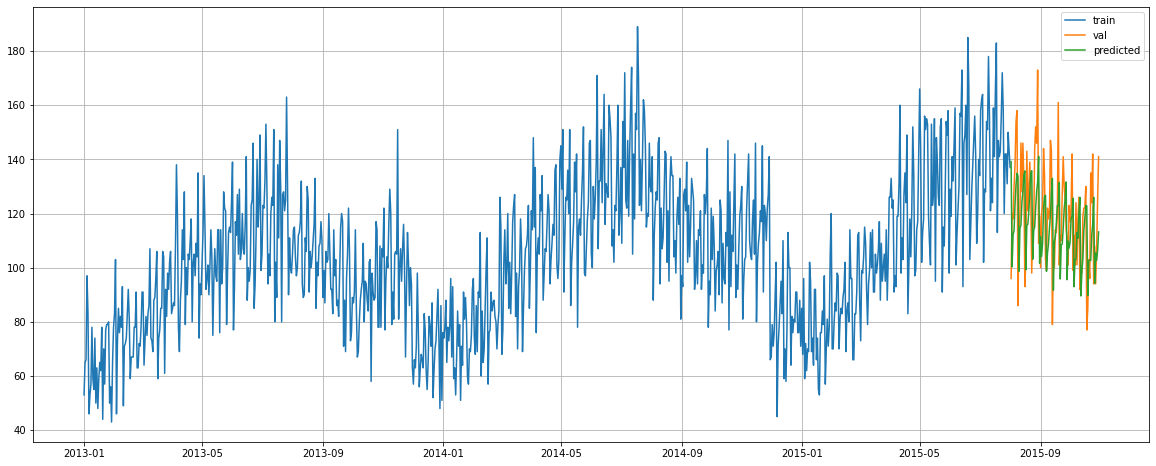

In [37]:
plt.figure(figsize = (20,8))
plt.plot(y[:-n], label = 'train')
plt.plot(y[-n:], label = 'val')
plt.plot(pred, label = 'predicted')

plt.legend()
plt.grid()
plt.show()

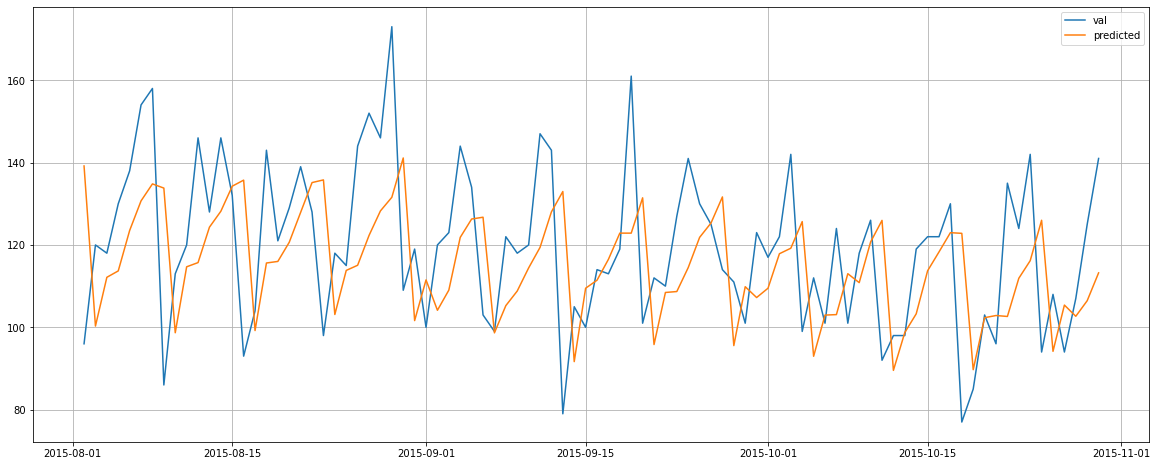

In [38]:
plt.figure(figsize = (20,8))
plt.plot(y[-n:], label = 'val')
plt.plot(pred, label = 'predicted')

plt.legend()
plt.grid()
plt.show()

# 4.평가 : 잔차분석

* 잔차에 대한 우리의 기대 : 화이트 노이즈
    * 자기상관성 없음 : ACF, PACF 그래프
    * 정규분포 : Shapiro-Wilk 검정
    * 평균과 분산이 일정(Stationary) : ADF 검정
* 만약 화이트 노이즈가 아니라면...
    * 더 찾아내야 할 패턴이 있다는 의미.

## (1) 시각화

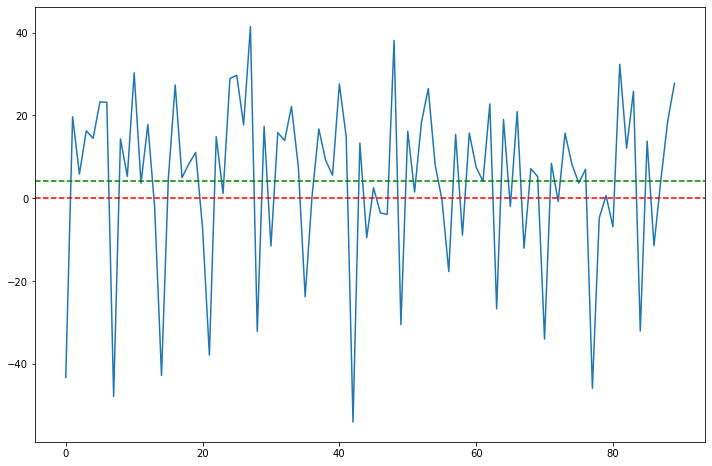

In [39]:
plt.figure(figsize = (12,8))
plt.plot(residuals)
plt.axhline(0, color = 'r', ls = '--')
plt.axhline(np.mean(residuals), color = 'g', ls = '--')
plt.show()

## (2) ACF, PACF

* 정상 데이터 및 자기상관관계가 없는 데이터라면
* ACF, PACF 그래프에서
    * 첫번째 lag 에서부터 하늘색 범위 안에 값이 위치해야 하고
    * 값의 등락에 대한 어떠한 패턴도 보이지 않아야 합니다.
* 그러나 실제 데이터에서는 그런 결과를 보기 쉽지 않습니다.

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### 1) ACF(자기 상관함수) 

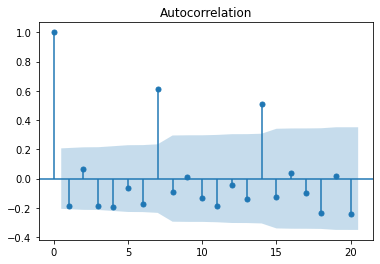

In [41]:
plot_acf(residuals, lags = 20)
plt.show()

In [42]:
res = residuals

res_df = pd.DataFrame({'residuals':residuals})

for i in range(1,21) :
    var = 'lag' + str(i)
    res_df[var] = res_df['residuals'].shift(i)

In [43]:
res_df.head(20)

,residuals,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19,lag20
0,-43.180576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.699294,-43.180576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.857375,19.699294,-43.180576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.303116,5.857375,19.699294,-43.180576,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.486349,16.303116,5.857375,19.699294,-43.180576,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,23.298336,14.486349,16.303116,5.857375,19.699294,-43.180576,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,23.177005,23.298336,14.486349,16.303116,5.857375,19.699294,-43.180576,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-47.807163,23.177005,23.298336,14.486349,16.303116,5.857375,19.699294,-43.180576,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,14.320122,-47.807163,23.177005,23.298336,14.486349,16.303116,5.857375,19.699294,-43.180576,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5.305012,14.320122,-47.807163,23.177005,23.298336,14.486349,16.303116,5.857375,19.699294,-43.180576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
res_df.corr()

,residuals,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19,lag20
residuals,1.000000,-0.193664,0.066896,-0.194262,-0.200670,-0.065472,-0.184548,0.668584,-0.106826,0.016611,...,-0.221240,-0.051635,-0.174372,0.622427,-0.164363,0.051290,-0.123854,-0.303096,0.020371,-0.317031
lag1,-0.193664,1.000000,-0.205355,0.067114,-0.186218,-0.209219,-0.042293,-0.202652,0.669266,-0.130196,...,-0.153553,-0.217061,-0.014383,-0.178104,0.629183,-0.169115,0.042682,-0.120951,-0.309787,0.054256
lag2,0.066896,-0.205355,1.000000,-0.206144,0.073814,-0.191085,-0.198503,-0.052026,-0.207071,0.666758,...,0.026176,-0.150308,-0.201742,-0.015675,-0.178380,0.629857,-0.175813,0.045430,-0.123607,-0.298396
lag3,-0.194262,0.067114,-0.206144,1.000000,-0.206848,0.073883,-0.194524,-0.200036,-0.052172,-0.210155,...,-0.126045,0.026306,-0.155725,-0.201825,-0.015655,-0.178541,0.630873,-0.175852,0.045412,-0.125994
lag4,-0.200670,-0.186218,0.073814,-0.206848,1.000000,-0.203390,0.058853,-0.186526,-0.197224,-0.039732,...,0.669140,-0.130958,0.001755,-0.155090,-0.203040,-0.013805,-0.173895,0.631013,-0.174453,0.025000
lag5,-0.065472,-0.209219,-0.191085,0.073883,-0.203390,1.000000,-0.197588,0.053246,-0.189239,-0.208228,...,-0.215520,0.673671,-0.120444,0.000951,-0.155072,-0.204733,-0.017730,-0.172508,0.630919,-0.165838
lag6,-0.184548,-0.042293,-0.198503,-0.194524,0.058853,-0.197588,1.000000,-0.179118,0.063326,-0.163518,...,-0.040969,-0.229721,0.656956,-0.120162,-0.000050,-0.154014,-0.195846,-0.024480,-0.171453,0.612801
lag7,0.668584,-0.202652,-0.052026,-0.200036,-0.186526,0.053246,-0.179118,1.000000,-0.185702,0.045819,...,-0.224259,-0.035583,-0.205330,0.660417,-0.120534,-0.002832,-0.163994,-0.193760,-0.027819,-0.146881
lag8,-0.106826,0.669266,-0.207071,-0.052172,-0.197224,-0.189239,0.063326,-0.185702,1.000000,-0.194735,...,-0.157449,-0.222638,-0.024108,-0.206243,0.661435,-0.121704,-0.005942,-0.162852,-0.195251,-0.017066
lag9,0.016611,-0.130196,0.666758,-0.210155,-0.039732,-0.208228,-0.163518,0.045819,-0.194735,1.000000,...,0.051835,-0.152065,-0.188136,-0.026753,-0.208275,0.667271,-0.134958,-0.000952,-0.169414,-0.162872


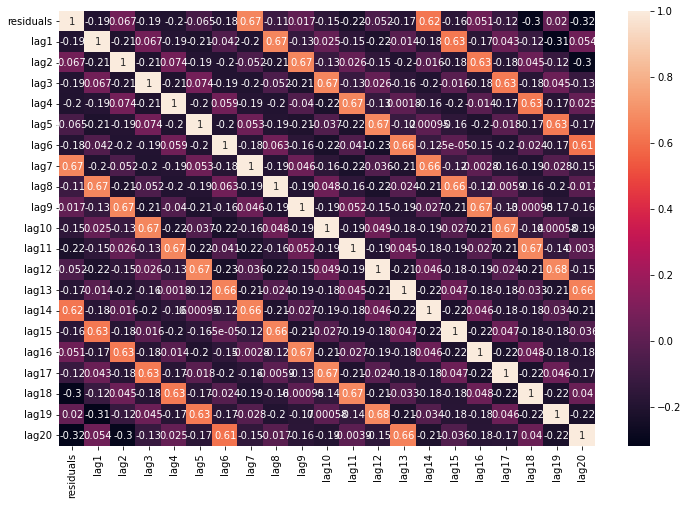

In [45]:
plt.figure(figsize = (12,8))
sns.heatmap(res_df.corr(), annot = True)
plt.show()

### 2) PACF

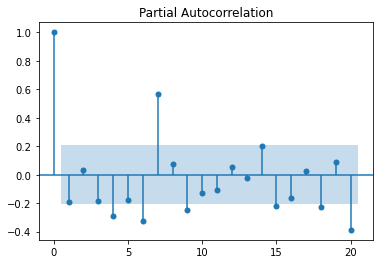

In [46]:
plot_pacf(residuals, lags = 20)
plt.show()

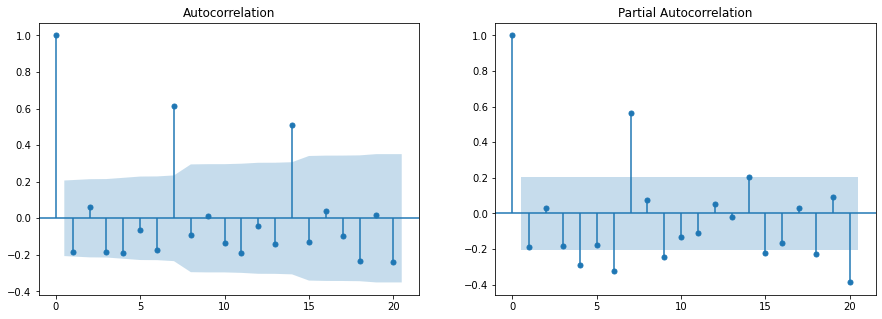

In [47]:
lags = 20

fig,ax = plt.subplots(1,2, figsize = (15,5))
plot_acf(residuals, lags = lags, ax = ax[0])
plot_pacf(residuals, lags = lags, ax = ax[1])
plt.show()

## (3) 검정
검정 도구를 적용하여 의사결정하는 용도로만 사용합니다.

In [48]:
from scipy import stats
import statsmodels.api as sm

### 1) 정규성 검정 : Shapiro-Wilk 검정

* 귀무가설 : **정규 분포이다.** (p-value > 0.05)
* 대립가설 : 정규분포가 아니다.

In [49]:
stats.shapiro(residuals)[1]

3.9795166230760515e-05

### 2) 정상성 검정 : ADF 검정

* 귀무가설 : 비정상(Non-Stationary) 데이터이다.
* 대립가설 : **정상(Stationary) 데이터**이다.(P-value <= 0.05)

In [ ]:
# ADF 테스트
sm.tsa.stattools.adfuller(residuals)[1]